In [17]:
import pandas as pd
import numpy as np

from skimage.io import imread
from skimage import img_as_float
from pylab import imshow
from sklearn.cluster import KMeans
#from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

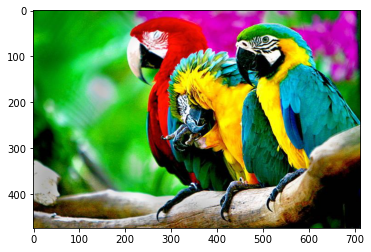

In [2]:
image = imread('D:/Work/Data_files/working_dir/parrots_4.jpg')
imshow(image)

In [35]:
converted_img = img_as_float(image)
converted_img.shape

(474, 713, 3)

In [36]:
X = pd.DataFrame(converted_img.reshape(-1, 3), columns = ['Red', 'Green', 'Blue'])
X.head()

,Red,Green,Blue
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [121]:
n_clusters = 13
kmeans = KMeans(init='k-means++', random_state=241, n_clusters=n_clusters)
kmeans.fit(X)
X['Class'] = kmeans.labels_
X.head()

,Red,Green,Blue,Class,Red_mean,Red_median,Green_mean,Green_median,Blue_mean,Blue_median
0,0.015686,0.494118,0.019608,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
1,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
2,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
3,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
4,0.007843,0.501961,0.011765,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686


In [122]:
# Reduct number of colour values to
# their mean and average values in cluster

mean_red = {}
median_red = {}
mean_green = {}
median_green = {}
mean_blue = {}
median_blue = {}
for pic_class in X.Class.unique():
    mean_red[pic_class] = X.Red[X.Class == pic_class].mean()
    median_red[pic_class] = X.Red[X.Class == pic_class].median()
    mean_green[pic_class] = X.Green[X.Class == pic_class].mean()
    median_green[pic_class] = X.Green[X.Class == pic_class].median()
    mean_blue[pic_class] = X.Blue[X.Class == pic_class].mean()
    median_blue[pic_class] = X.Blue[X.Class == pic_class].median()
    
X['Red_mean'] = X.Class.map(mean_red)
X['Red_median'] = X.Class.map(median_red)
X['Green_mean'] = X.Class.map(mean_green)
X['Green_median'] = X.Class.map(median_green)
X['Blue_mean'] = X.Class.map(mean_blue)
X['Blue_median'] = X.Class.map(median_blue)

X.head()

,Red,Green,Blue,Class,Red_mean,Red_median,Green_mean,Green_median,Blue_mean,Blue_median
0,0.015686,0.494118,0.019608,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
1,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
2,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
3,0.007843,0.494118,0.007843,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686
4,0.007843,0.501961,0.011765,9,0.036416,0.015686,0.584261,0.584314,0.021208,0.015686


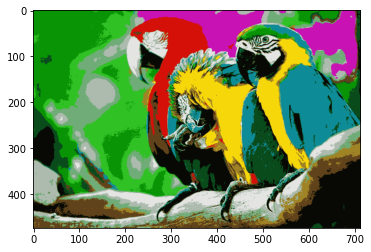

In [123]:
redused_img = X.loc[:, ['Red_mean', 'Green_mean', 'Blue_mean']].values.reshape(474, 713, 3)
imshow(redused_img)

In [124]:
# Quality metric PSNR through colours MSE-s
MSE_mean = (np.square(X.Red.values - X.Red_mean.values).mean() +\
            np.square(X.Green.values - X.Green_mean.values).mean() +\
            np.square(X.Blue.values - X.Blue_mean.values).mean()) / 3
MSE_median = (np.square(X.Red.values - X.Red_median.values).mean() +\
             np.square(X.Green.values - X.Green_median.values).mean() +\
             np.square(X.Blue.values - X.Blue_median.values).mean()) / 3
MAX_pix = 1    # Max pixel value (1 for images converted to float)
PSNR_mean = 20 * np.log10(MAX_pix) - 10 * np.log10(MSE_mean)
PSNR_median = 20 * np.log10(MAX_pix) - 10 * np.log10(MSE_median)
PSNR_mean, PSNR_median

(20.459368766610524, 20.252225891664533)